In [53]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns


In [54]:
#uploading the dataset from my pc to the note book
# Load CSV from data folder
df = pd.read_csv("../data/raw_analyst_ratings.csv")  # .. means "go up one folder")


Exploratory Data Analysis (EDA), the goal is to understand my  dataset, find patterns, spot anomalies, check assumptions, and summarize key insights before starting modeling

In [55]:
df.shape #check the number of rows and columns
df.info()#checking for missing values
df.describe() #statistical summary of numerical columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1407328 entries, 0 to 1407327
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   Unnamed: 0  1407328 non-null  int64 
 1   headline    1407328 non-null  object
 2   url         1407328 non-null  object
 3   publisher   1407328 non-null  object
 4   date        1407328 non-null  object
 5   stock       1407328 non-null  object
dtypes: int64(1), object(5)
memory usage: 64.4+ MB


,Unnamed: 0
count,1.407328e+06
mean,7.072454e+05
std,4.081009e+05
min,0.000000e+00
25%,3.538128e+05
50%,7.072395e+05
75%,1.060710e+06
max,1.413848e+06


In [56]:
df.columns # checking the  columns we have on the dataset

Index(['Unnamed: 0', 'headline', 'url', 'publisher', 'date', 'stock'], dtype='object')

In [57]:
df= df.drop(columns=["Unnamed: 0"])

In [58]:
df.head()


,headline,url,publisher,date,stock
0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


In [59]:
#1.desciptive statistics: there are various statistical measures 
# we can use to summarize and describe the main features of a dataset. 
# These include measures of central tendency (mean, median, mode),
# measures of dispersion (range, variance, standard deviation),
# measures of shape (skewness, kurtosis).

#1.1 Analysing headline lengths 
df['headline_length'] = df['headline'].apply(len)
print(df['headline_length'].describe())


count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64


In [60]:
#1.1 cont.. 
# centeral tendency [mean,median,mode]# Central tendency
mean_len = df['headline_length'].mean()
median_len = df['headline_length'].median()
mode_len = df['headline_length'].mode()[0]

print(f"Mean headline length: {mean_len:.2f}")
print(f"Median headline length: {median_len}")
print(f"Mode headline length: {mode_len}")
# measures of dispersion [range,variance,standard deviation]

variance_len = df['headline_length'].var()
std_len = df['headline_length'].std()
range_len = df['headline_length'].max() - df['headline_length'].min()
iqr_len = df['headline_length'].quantile(0.75) - df['headline_length'].quantile(0.25)

print(f"Variance: {variance_len:.2f}")
print(f"Standard Deviation: {std_len:.2f}")
print(f"Range: {range_len}")
print(f"IQR: {iqr_len}")
#shape of the distribution [skewness,kurtosis]
# Shape
skewness = df['headline_length'].skew()
kurtosis = df['headline_length'].kurtosis()

print(f"Skewness: {skewness:.2f}")
print(f"Kurtosis: {kurtosis:.2f}")





Mean headline length: 73.12
Median headline length: 64.0
Mode headline length: 47
Variance: 1659.37
Standard Deviation: 40.74
Range: 509
IQR: 40.0
Skewness: 2.10
Kurtosis: 6.48


<Figure size 1200x600 with 0 Axes>

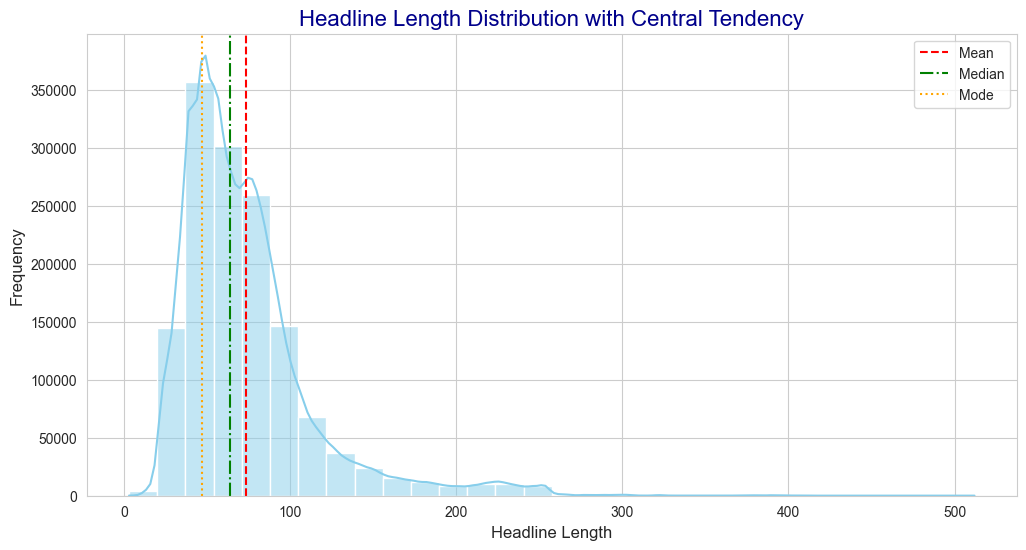

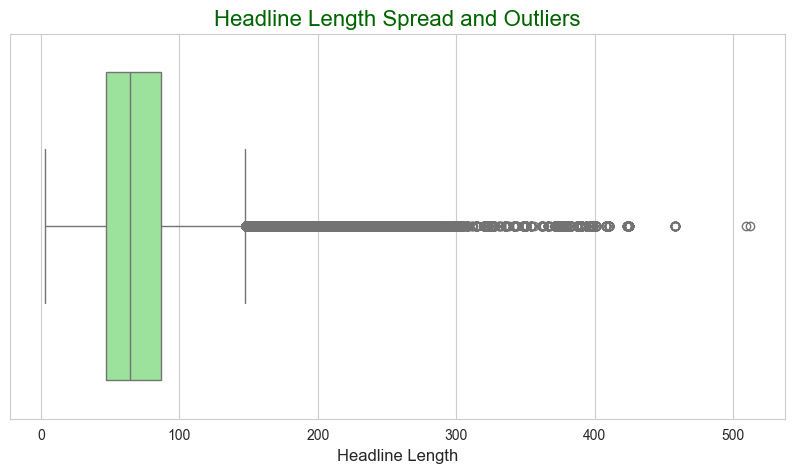

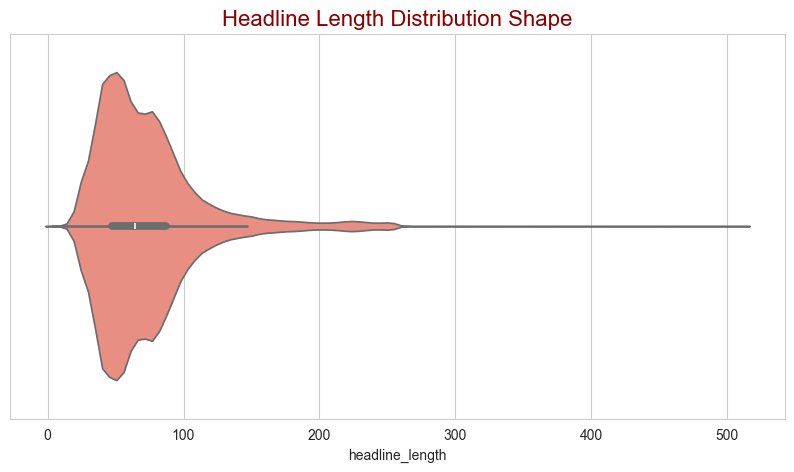

In [61]:
# lets visualize the distribution of headline lengths

# Set seaborn style for colorful plots
sns.set_style("whitegrid")
plt.figure(figsize=(12,6))


plt.figure(figsize=(12,6))
sns.histplot(df['headline_length'], bins=30, kde=True, color='skyblue')

# Add lines for mean, median, mode
plt.axvline(df['headline_length'].mean(), color='red', linestyle='--', label='Mean')
plt.axvline(df['headline_length'].median(), color='green', linestyle='-.', label='Median')
plt.axvline(df['headline_length'].mode()[0], color='orange', linestyle=':', label='Mode')

plt.title("Headline Length Distribution with Central Tendency", fontsize=16, color='darkblue')
plt.xlabel("Headline Length", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.legend()
plt.show()


plt.figure(figsize=(10,5))
sns.boxplot(x=df['headline_length'], color='lightgreen')
plt.title("Headline Length Spread and Outliers", fontsize=16, color='darkgreen')
plt.xlabel("Headline Length", fontsize=12)
plt.show()

# Violin plot for distribution shape
plt.figure(figsize=(10,5))
sns.violinplot(x=df['headline_length'], color='salmon')
plt.title("Headline Length Distribution Shape", fontsize=16, color='darkred')
plt.show()


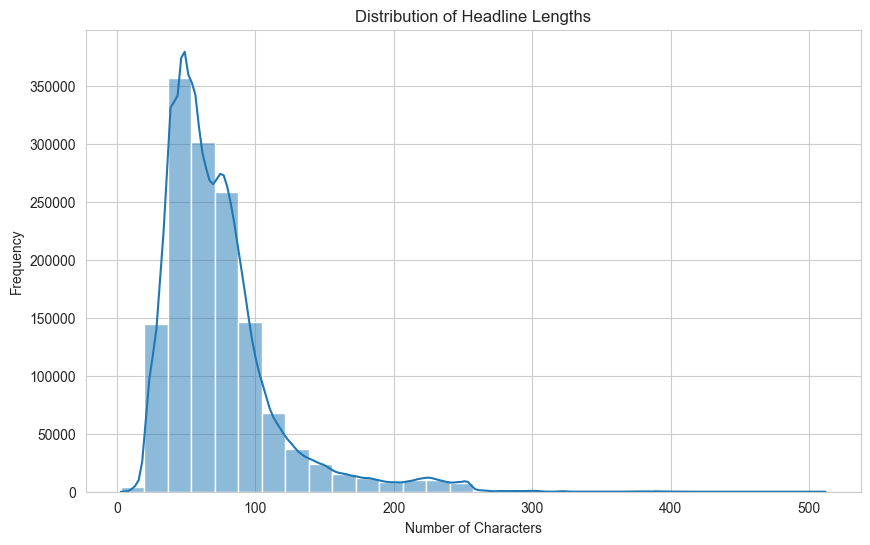

In [62]:
#1.1 cont..
# lets visualize the distribution of headline lengths
plt.figure(figsize=(10,6))
sns.histplot(df['headline_length'], bins=30, kde=True)
plt.title("Distribution of Headline Lengths")
plt.xlabel("Number of Characters")
plt.ylabel("Frequency")
plt.show()

publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
                      ...  
MoneyGeek                 1
muathe                    1
Robert Morris             1
LeftCoastHedgie           1
Jeremie Capron            1
Name: count, Length: 1034, dtype: int64


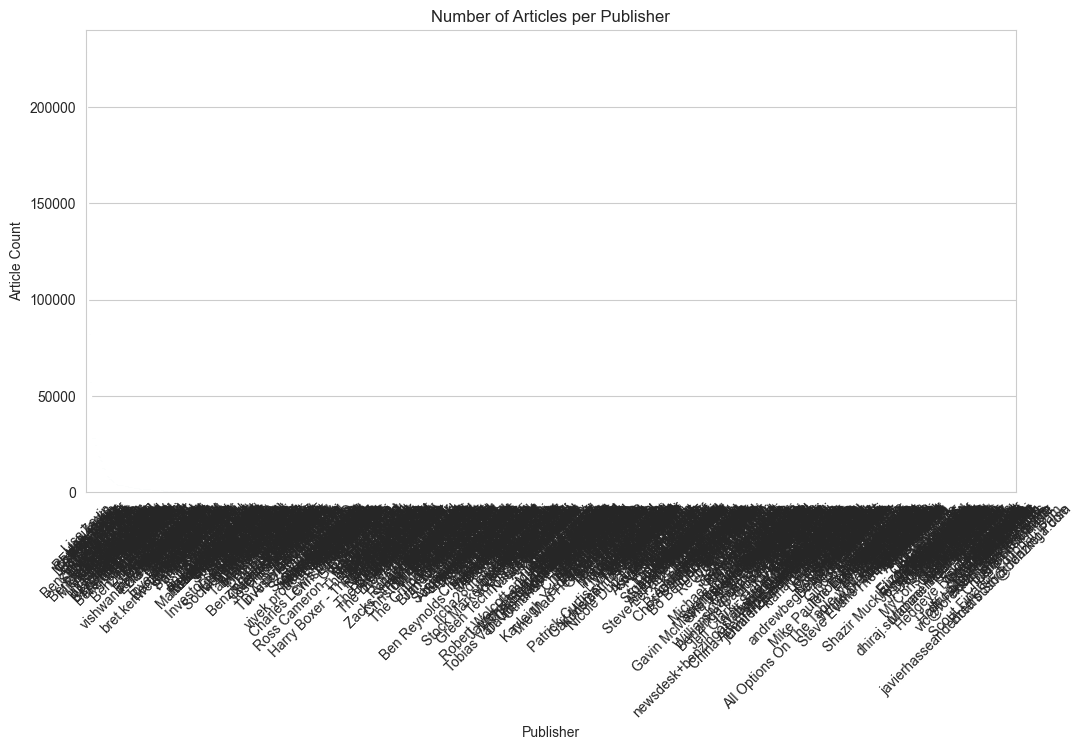

In [63]:
#1.2 Publisher Analysis with Visualizations
# Count articles per publisher
publisher_counts = df['publisher'].value_counts()
print(publisher_counts)

# Visualize top publishers
plt.figure(figsize=(12,6))
sns.barplot(x=publisher_counts.index, y=publisher_counts.values)
plt.xticks(rotation=45)
plt.title("Number of Articles per Publisher")
plt.ylabel("Article Count")
plt.xlabel("Publisher")
plt.show()


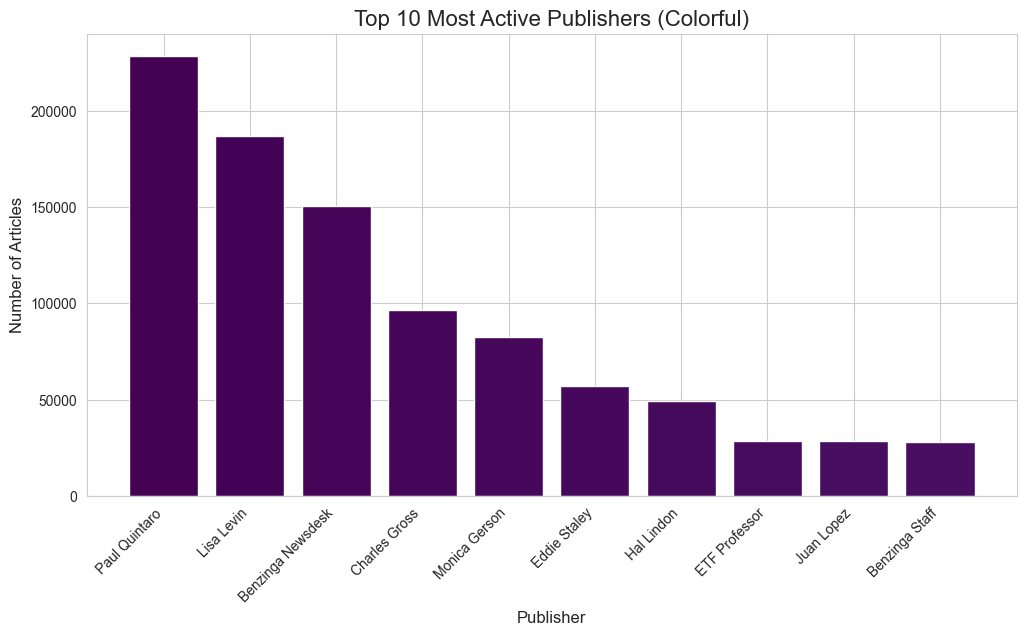

In [64]:
# To clearly see the distribution of article counts among publishers.
# Show only top N publishers

# Count articles per publisher for  10 most active publishers
publisher_counts = df['publisher'].value_counts()

# Take top 10 publishers
top_publishers = publisher_counts.head(10)

colors = plt.cm.viridis(range(len(top_publishers)))  # create gradient colors

plt.figure(figsize=(12,6))
plt.bar(top_publishers.index, top_publishers.values, color=colors)
plt.xticks(rotation=45, ha='right')
plt.title("Top 10 Most Active Publishers (Colorful)", fontsize=16)
plt.xlabel("Publisher", fontsize=12)
plt.ylabel("Number of Articles", fontsize=12)
plt.show()



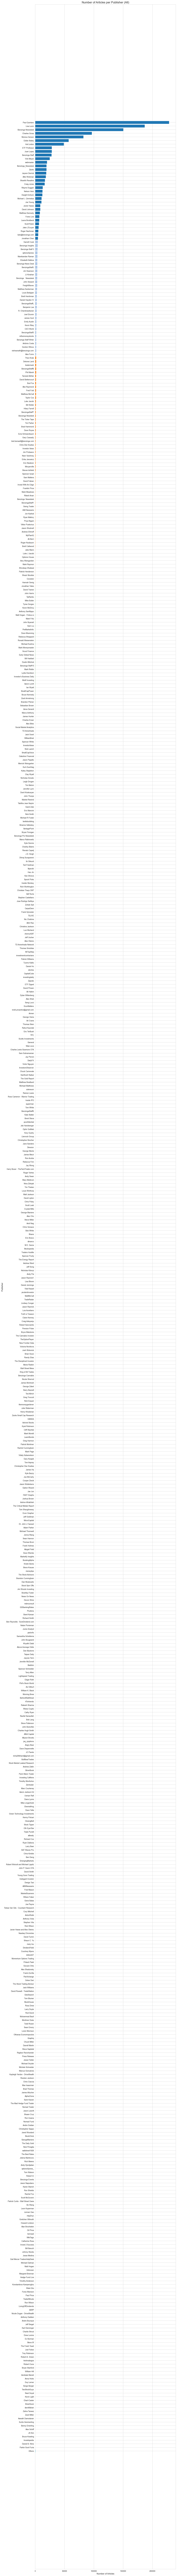

In [65]:
#Or lets use Horizontal Bar Chart for All Publishers

publisher_counts = df['publisher'].value_counts()

# Group very small publishers into "Others"
threshold = 5  # publishers with <=5 articles
small_publishers = publisher_counts[publisher_counts <= threshold].sum()
large_publishers = publisher_counts[publisher_counts > threshold]

# Combine using pd.concat
all_publishers = pd.concat([large_publishers, pd.Series({'Others': small_publishers})])

# Generate distinct colors
colors = plt.cm.tab20(np.linspace(0, 1, len(all_publishers)))

# Horizontal bar chart
plt.figure(figsize=(14, max(6, len(all_publishers)*0.4)))  # dynamic height
plt.barh(all_publishers.index, all_publishers.values, color=colors)
plt.xlabel("Number of Articles", fontsize=12)
plt.ylabel("Publisher", fontsize=12)
plt.title("Number of Articles per Publisher (All)", fontsize=16)
plt.gca().invert_yaxis()  # largest at top
plt.show()



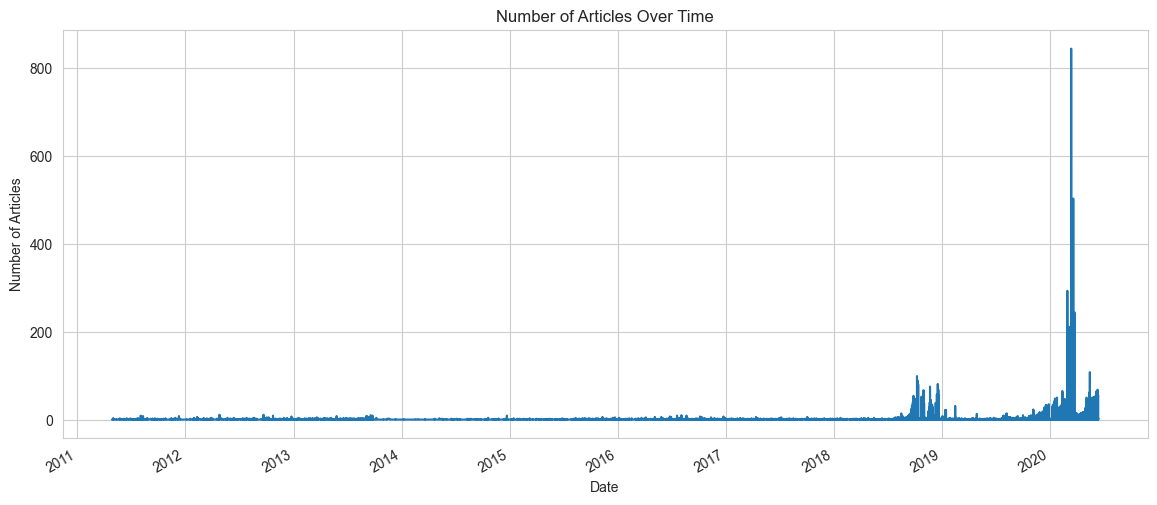

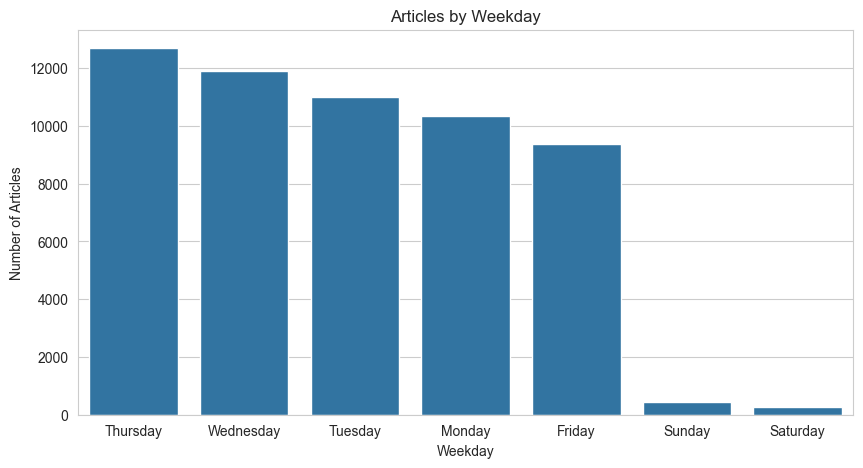

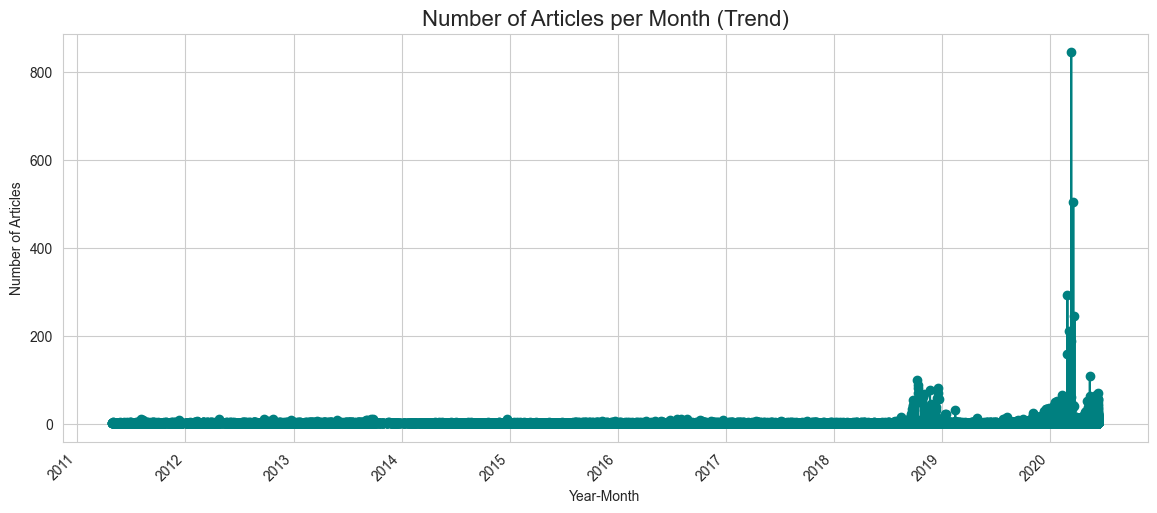

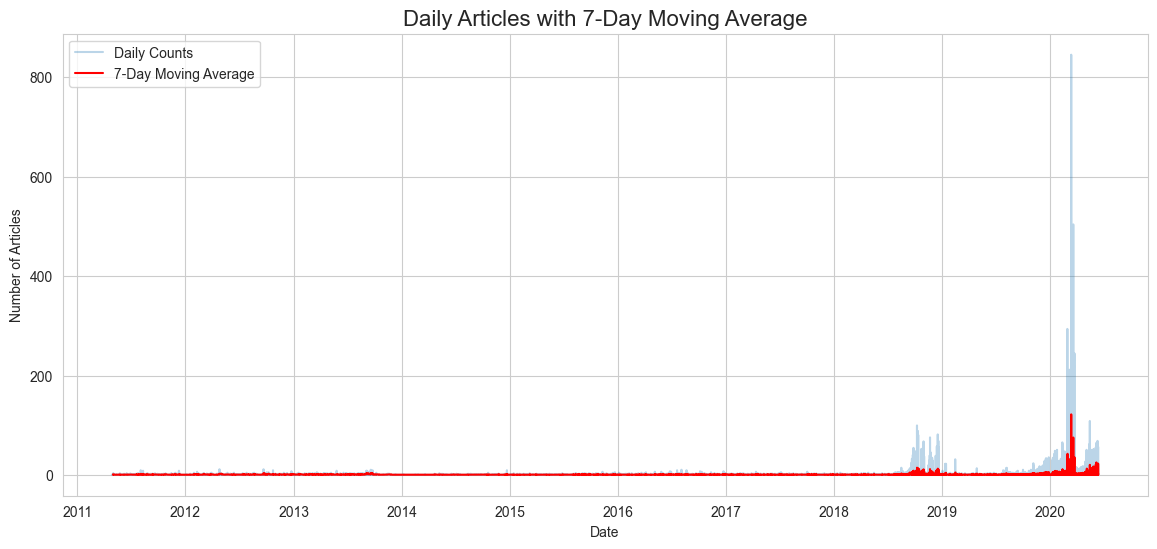

Number of articles during event: 1102


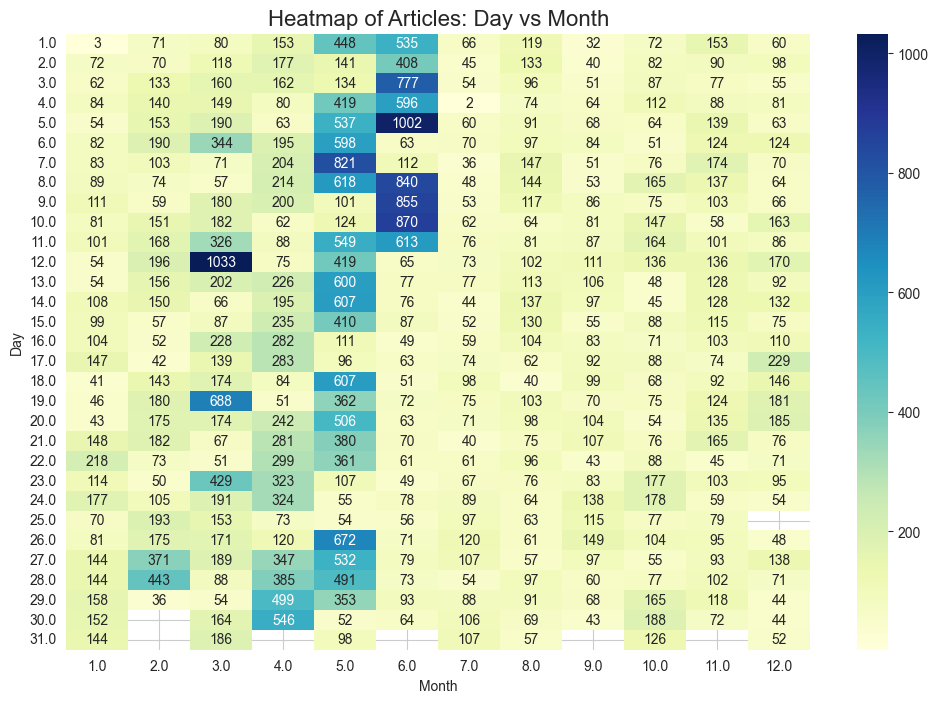

In [66]:
#1.3 working with dates and times
# Convert to datetime
df['date'] = pd.to_datetime(df['date'],errors='coerce')

# Extract day, month, weekday
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['weekday'] = df['date'].dt.day_name()

# Articles over time
articles_per_day = df.groupby('date').size()

plt.figure(figsize=(14,6))
articles_per_day.plot()
plt.title("Number of Articles Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Articles")
plt.show()

# Articles by weekday
weekday_counts = df['weekday'].value_counts()
plt.figure(figsize=(10,5))
sns.barplot(x=weekday_counts.index, y=weekday_counts.values)
plt.title("Articles by Weekday")
plt.xlabel("Weekday")
plt.ylabel("Number of Articles")
plt.show()

#2. Articles by Month or Year
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

# Monthly trends
plt.figure(figsize=(14,6))
articles_per_day.plot(marker='o', linestyle='-', color='teal')
plt.xticks(rotation=45, ha='right')
plt.title("Number of Articles per Month (Trend)", fontsize=16)
plt.xlabel("Year-Month")
plt.ylabel("Number of Articles")
plt.grid(True)
plt.show()


# 7-day moving average
daily_counts_ma = articles_per_day.rolling(window=7).mean()

plt.figure(figsize=(14,6))
plt.plot(articles_per_day, alpha=0.3, label='Daily Counts')
plt.plot(daily_counts_ma, color='red', label='7-Day Moving Average')
plt.title("Daily Articles with 7-Day Moving Average", fontsize=16)
plt.xlabel("Date")
plt.ylabel("Number of Articles")
plt.legend()
plt.show()

#3. Analyzing Articles During Specific Events
event_start = '2020-05-20'
event_end = '2020-05-25'
event_articles = df[(df['date'] >= event_start) & (df['date'] <= event_end)]
print(f"Number of articles during event: {len(event_articles)}")

#4. Heatmap of Articles by Day and Month
df['day'] = df['date'].dt.day
heatmap_data = df.pivot_table(index='day', columns='month', values='headline', aggfunc='count')

plt.figure(figsize=(12,8))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt=".0f")
plt.title("Heatmap of Articles: Day vs Month", fontsize=16)
plt.xlabel("Month")
plt.ylabel("Day")
plt.show()

